## Matrix Multiplication Run Times

In [23]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [24]:
compiled_dir = f"..{os.sep}compiled"
plot_dir = f"..{os.sep}plots"

In [25]:
program_base_name = f"{compiled_dir}{os.sep}exercise_1"

In [26]:
opt_flags = ["O0", "O1", "O2", "O3", "Ofast"]
opt_flag_descriptors = [
    "Without optimization",
    "With O1 optimization",
    "With O2 optimization",
    "With O3 optimization",
    "With Ofast optimization"
]

In [27]:
mat_sizes = np.array([100, 250, 500, 750, 1000, 2000, 3000, 5000, 10000])

In [28]:
def get_run_time(mat_mul_method, flag, mat_dim):
    """Get the run time for the given matrix multiplication method,
        optimization flag, and matrix dimension.
    """
    run_params = [
        f"{program_base_name}_{flag}",
        "--mat_mul_method", mat_mul_method,
        "--num_rows", str(mat_dim),
        "--num_cols", str(mat_dim),
        "--num_inner_dim", str(mat_dim)
    ]

    output = subprocess.run(
        run_params, stdout=subprocess.PIPE, encoding='ascii'
    )

    lines = output.stdout.split('\n')

    return float(lines[4].split('=')[1])

In [29]:
def write_csv(filename, matrix_dims, run_times):
    """Write list of run times as a function of matrix dimension to a file."""
    w = csv.writer(open(filename, "w"))
    w.writerow(["matrix_dim,run_time"])
    w.writerows(list(zip(matrix_dims, run_times)))

### Get Run Times

In [30]:
run_times = {
    "matmul": np.zeros((len(opt_flags), len(mat_sizes))),
    "row-col": np.zeros((len(opt_flags), len(mat_sizes))),
    "col-row": np.zeros((len(opt_flags), len(mat_sizes)))
}

In [ ]:
for mat_mul_method in run_times.keys():
    output_base_filename = f"..{os.sep}data{os.sep}{mat_mul_method}_runtimes"

    print(f"Running {mat_mul_method} ...")

    for i, flag in enumerate(opt_flags):
        # iterate over matrix sizes
        for j, mat_dim in enumerate(mat_sizes):
            run_times[mat_mul_method][i, j] = get_run_time(mat_mul_method, flag, mat_dim)

        # write file
        write_csv(f"{output_base_filename}_{flag}.csv", mat_sizes, run_times[mat_mul_method][i])

Running matmul ...
Running row-col ...
Running col-row ...


In [10]:
run_times["matmul"]

array([[1.390000e-04, 1.037000e-03, 7.432000e-03, 2.811900e-02,
        4.966300e-02, 3.997120e-01, 1.323061e+00],
       [4.110000e-04, 1.673000e-03, 1.137600e-02, 3.009300e-02,
        4.979400e-02, 3.934940e-01, 1.323202e+00],
       [1.220000e-04, 1.556000e-03, 1.090500e-02, 2.730400e-02,
        4.887300e-02, 3.942600e-01, 1.320290e+00],
       [5.110000e-04, 1.692000e-03, 1.188200e-02, 2.989800e-02,
        4.918300e-02, 3.924970e-01, 1.312881e+00],
       [1.950000e-04, 1.710000e-03, 1.159800e-02, 2.758900e-02,
        4.857500e-02, 3.921780e-01, 1.315057e+00]])

In [11]:
run_times["row-col"]

array([[3.44600000e-03, 5.44750000e-02, 4.32455000e-01, 1.46035700e+00,
        3.47271600e+00, 2.82458300e+01, 1.40607792e+02],
       [3.48300000e-03, 5.49910000e-02, 4.30553000e-01, 1.46032500e+00,
        3.46767700e+00, 2.83182600e+01, 1.45491671e+02],
       [3.44200000e-03, 5.47930000e-02, 4.28784000e-01, 1.45701100e+00,
        3.47613800e+00, 2.83438000e+01, 1.44392346e+02],
       [3.50100000e-03, 5.32890000e-02, 4.29987000e-01, 1.45801300e+00,
        3.47451000e+00, 2.81786530e+01, 1.43751302e+02],
       [3.46500000e-03, 5.36180000e-02, 4.34110000e-01, 1.50316100e+00,
        3.54019400e+00, 2.86969010e+01, 1.45214459e+02]])

In [12]:
run_times["col-row"]

array([[2.3720000e-03, 3.8377000e-02, 3.0636500e-01, 1.0318170e+00,
        2.4598860e+00, 1.9895499e+01, 6.7459232e+01],
       [2.3750000e-03, 3.8138000e-02, 3.1036600e-01, 1.0422790e+00,
        2.4954190e+00, 2.0002160e+01, 6.7246919e+01],
       [2.3520000e-03, 3.8172000e-02, 3.0940900e-01, 1.0441280e+00,
        2.4773740e+00, 1.9993196e+01, 6.7185400e+01],
       [2.4400000e-03, 3.8475000e-02, 3.0802300e-01, 1.0521300e+00,
        2.4888240e+00, 1.9995857e+01, 6.7088014e+01],
       [2.3930000e-03, 3.9261000e-02, 3.0892300e-01, 1.0439010e+00,
        2.4780100e+00, 1.9931013e+01, 6.7742972e+01]])

### Perform Fit

In [13]:
fit_mat_sizes = np.linspace(mat_sizes[0], mat_sizes[-1], 100)

In [14]:
fit_params = {
    "matmul": np.zeros((len(opt_flags), 2)),
    "row-col": np.zeros((len(opt_flags), 2)),
    "col-row": np.zeros((len(opt_flags), 2))
}

In [15]:
fit_run_times = {
    "matmul": np.zeros((len(opt_flags), len(fit_mat_sizes))),
    "row-col": np.zeros((len(opt_flags), len(fit_mat_sizes))),
    "col-row": np.zeros((len(opt_flags), len(fit_mat_sizes)))
}

In [16]:
for mat_mul_method in run_times.keys():
    for i, flag in enumerate(opt_flags):
        p = np.polyfit(np.log(mat_sizes), np.log(run_times[mat_mul_method][i]), 1)
        fit_params[mat_mul_method][i] = p
        fit_run_times[mat_mul_method][i] = np.exp(p[0] * np.log(fit_mat_sizes) + p[1])

In [17]:
fit_params

{'matmul': array([[  2.72772754, -21.70176386],
        [  2.40874556, -19.33759839],
        [  2.69327532, -21.39258628],
        [  2.35378295, -18.9457596 ],
        [  2.5715146 , -20.51298656]]),
 'row-col': array([[  3.0773704 , -19.9222613 ],
        [  3.08046131, -19.9350659 ],
        [  3.08255294, -19.95238061],
        [  3.08025237, -19.94002167],
        [  3.08721591, -19.97341302]]),
 'col-row': array([[  3.01281032, -19.90934615],
        [  3.01381491, -19.91092742],
        [  3.01547532, -19.92439691],
        [  3.00641436, -19.85823456],
        [  3.0093774 , -19.87777704]])}

### Plot Results

In [18]:
plot_names = [f"{plot_dir}{os.sep}matmul_run_times_{opt}.pdf" for opt in opt_flags]

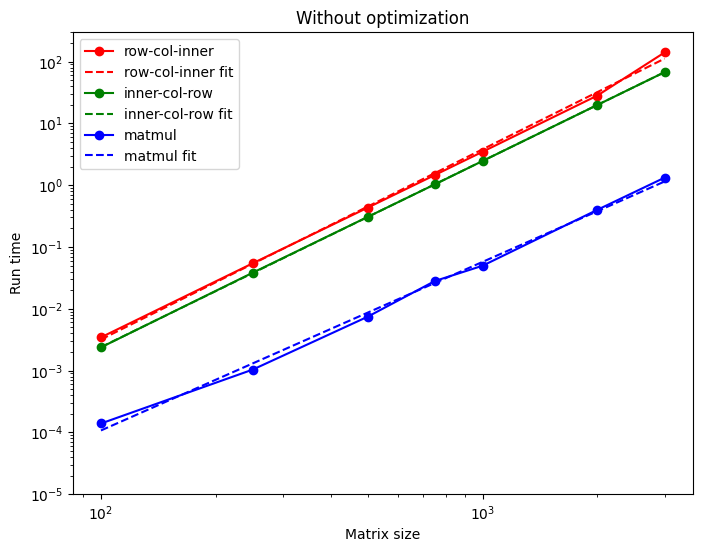

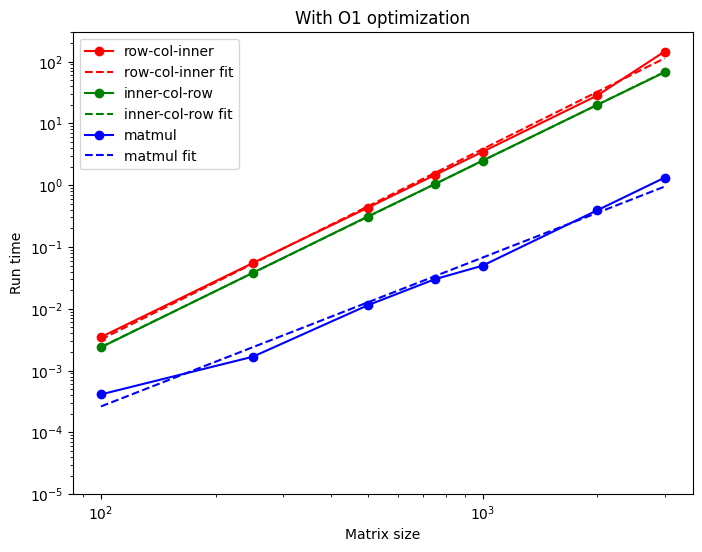

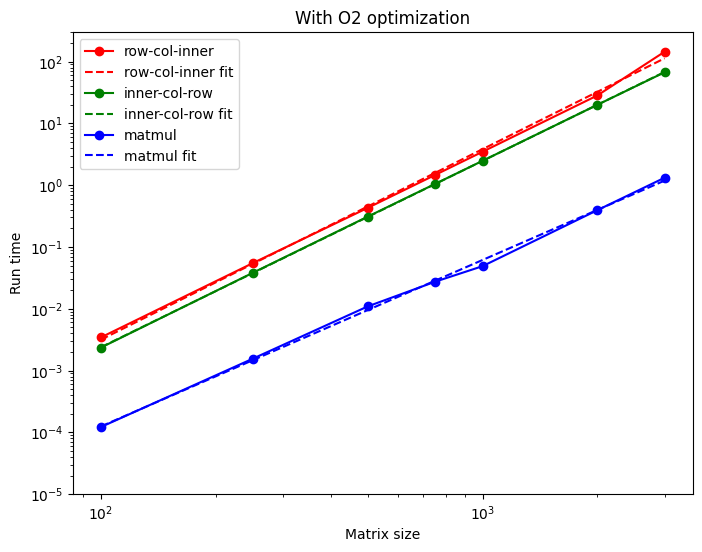

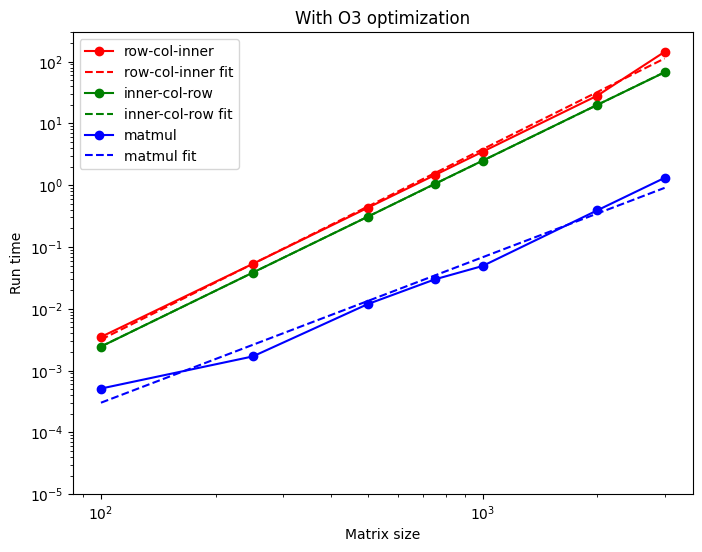

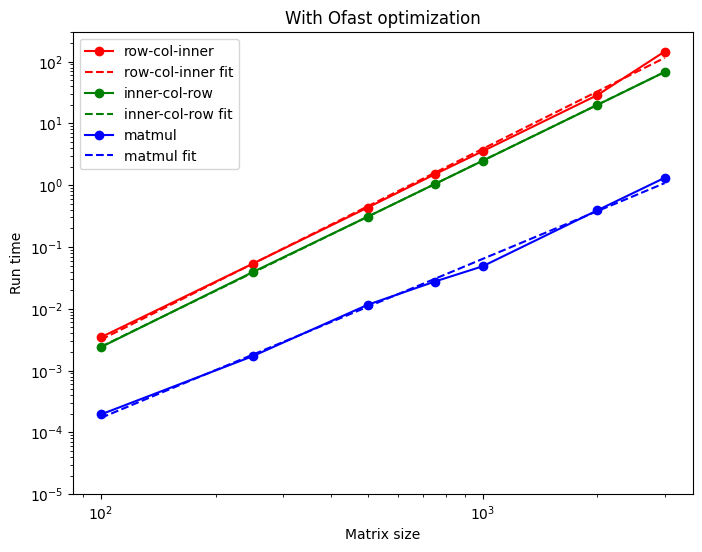

In [22]:
for i in range(len(opt_flags)):
    plt.figure(figsize=(8, 6))
    plt.loglog(mat_sizes, run_times["row-col"][i], 'o-', c='r', label='row-col-inner')
    plt.loglog(fit_mat_sizes, fit_run_times["row-col"][i],'--',  c='r', label='row-col-inner fit')
    
    plt.loglog(mat_sizes, run_times["col-row"][i], 'o-', c='g', label='inner-col-row')
    plt.loglog(fit_mat_sizes, fit_run_times["col-row"][i], '--', c='g', label='inner-col-row fit')
    
    plt.loglog(mat_sizes, run_times["matmul"][i], 'o-', c='b', label='matmul')
    plt.loglog(fit_mat_sizes, fit_run_times["matmul"][i], '--', c='b', label='matmul fit')
    
    plt.title(opt_flag_descriptors[i])
    plt.xlabel('Matrix size')
    plt.ylabel('Run time')
    plt.ylim([1e-5, 3e2])
    plt.legend(loc='upper left')
    plt.savefig(plot_names[i], format="pdf", bbox_inches="tight");